In [ ]:
# importing the dask 
import dask.dataframe as dd
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
df=dd.read_csv('amazon_sales_dataset.csv')
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [2]:
# how many rows and columns
print("Rows:", df.shape[0].compute())
print("Columns:", df.shape[1])

Rows: 50000
Columns: 13


In [3]:
df.dtypes

order_id                      int64
order_date          string[pyarrow]
product_id                    int64
product_category    string[pyarrow]
price                       float64
discount_percent              int64
quantity_sold                 int64
customer_region     string[pyarrow]
payment_method      string[pyarrow]
rating                      float64
review_count                  int64
discounted_price            float64
total_revenue               float64
dtype: object

In [4]:
df1 = df.drop(columns=['order_id','order_date','product_id'])

In [5]:
df1.describe().compute() # we checking numeric summary

,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


In [ ]:
# This shows you understand how the Dask's lazy evaluation.

In [6]:
df.isnull().sum().compute()


order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [7]:
df["order_date"] = dd.to_datetime(df["order_date"])  # converting string into datatimme

In [8]:
df["order_date"].dtype # checking df["order_date"] dtype

dtype('<M8[ns]')

In [9]:
df['Month']=df["order_date"].dt.month # creating new column month to chech monthly sales

In [10]:
df['Month'].compute()

0        4
1        3
2        9
3        4
4        3
        ..
49995    9
49996    7
49997    2
49998    9
49999    6
Name: Month, Length: 50000, dtype: int32

In [50]:
# Analyzing total revenue by product category.
total_revenue_category=df.groupby('product_category')['total_revenue'].sum()
total_revenue_category.compute().sort_values(ascending=False)

product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64

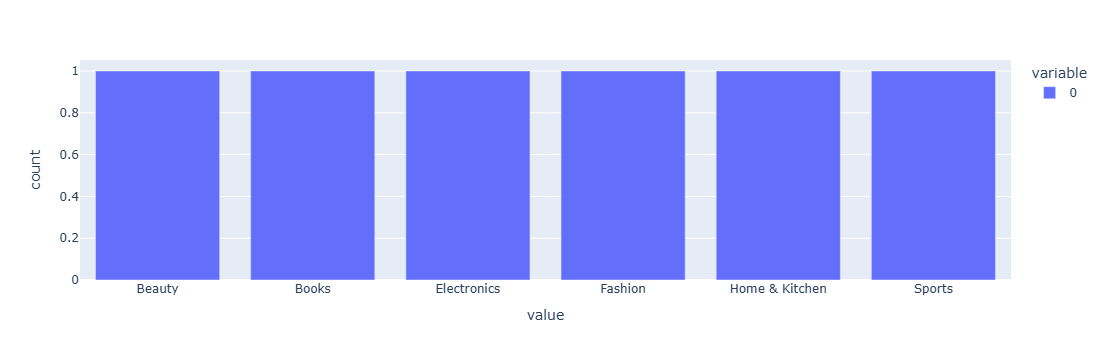

In [53]:
ex.bar(total_revenue_category.index)

In [48]:
""" Insight: From this chart, I observed that revenue is evenly distributed across categories, which shows stable 
customer demand and a diversified product range,with the Beauty slightly leading in total revenue."""

' From this chart, I observed that revenue is evenly distributed across categories, which shows stable \ncustomer demand and a diversified product range.'

In [16]:
# Analyzing sales based on location.
sales_location=df.groupby('customer_region')['total_revenue'].sum().compute()
sales_location.sort_values(ascending=False)

customer_region
Middle East      8301844.50
North America    8277217.84
Asia             8175199.83
Europe           8112311.57
Name: total_revenue, dtype: float64

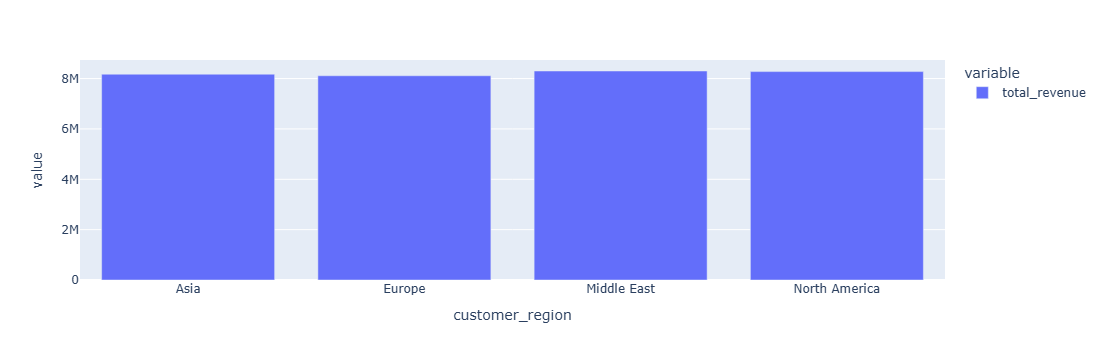

In [25]:
ex.bar(sales_location)

In [ ]:
"""Insight:From this analysis, I observed that sales performance is consistent across regions, with the Middle East slightly leading in total revenue."""

In [17]:
# peaks sales of month
month_sales=df.groupby('Month')['total_revenue'].sum().compute()
month_sales.sort_values(ascending=False)

Month
1     2883926.88
8     2845629.94
5     2806178.34
7     2788265.84
10    2760754.34
3     2759003.83
6     2746947.62
9     2744974.92
12    2721394.94
4     2678973.77
11    2625428.52
2     2505094.80
Name: total_revenue, dtype: float64

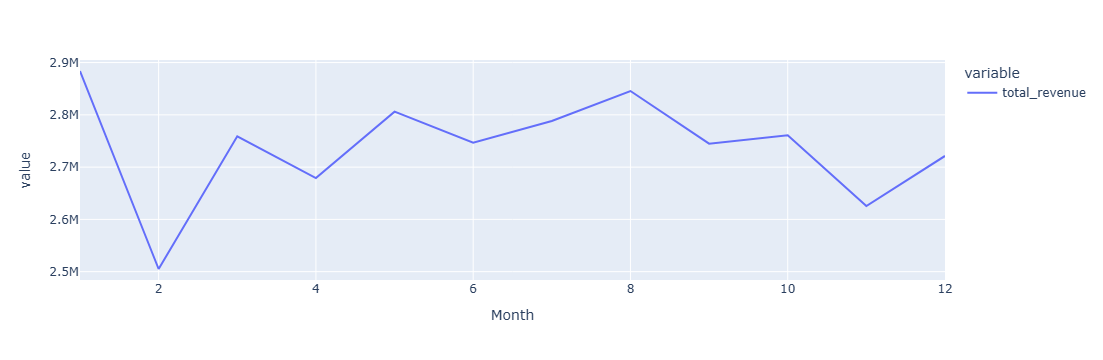

In [23]:
ex.line(month_sales) # Analyzing sales trends over time.

In [55]:
"""Insight:From this graph, I observed that sales vary across months, with peak performance in Month 1 and Month 8, 
while Month 2 shows comparatively lower sales."""

'From this graph, I observed that sales vary across months, with peak performance in Month 1 and Month 8, \nwhile Month 2 shows comparatively lower sales.'

In [28]:
 # top rating by category
product_rating = df.groupby('product_category')['rating'].mean()
product_rating_pd = product_rating.compute()                           
product_rating_pd.sort_values(ascending=False)

product_category
Books             3.020259
Sports            2.996891
Home & Kitchen    2.996706
Electronics       2.991298
Fashion           2.987782
Beauty            2.985186
Name: rating, dtype: float64

In [ ]:
"""Insight:From this analysis, I observed that the Books category has the highest customer satisfaction, while other categories 
show slightly lower but stable ratings."""

In [37]:
# Which region has highest customer ratings
highest_rating_region=df.groupby('customer_region')['rating'].mean().compute()

In [39]:
highest_rating_region.sort_values(ascending=False)

customer_region
Middle East      3.015434
North America    3.000360
Asia             2.995721
Europe           2.973651
Name: rating, dtype: float64

In [ ]:
"""Insight:From this analysis, I observed that customers from the Middle East region give the highest ratings, indicating strong satisfaction, while
Europe shows slightly lower ratings compared to other regions."""

In [58]:
 # Analyzing Which product has highest number of orders
number_orders_category=df.groupby('product_category')['quantity_sold'].sum().compute() 

In [59]:
number_orders_category.sort_values(ascending=False)

product_category
Beauty            25422
Fashion           25089
Books             25065
Electronics       24898
Sports            24753
Home & Kitchen    24743
Name: quantity_sold, dtype: int64

In [ ]:
"""Insight:From this analysis, I observed that Beauty products have the highest number of orders, showing strong 
customer demand, while Sports and Home & Kitchen categories have comparatively lower order volumes."""

In [41]:
# Does rating improve over time
rating_trend = df.groupby('Month')['rating'].mean().compute()

In [42]:
rating_trend.sort_values(ascending=False)

Month
4     3.018306
7     3.015131
1     3.012633
8     3.012158
10    3.011448
11    2.999800
5     2.994937
6     2.986398
3     2.980578
12    2.976813
2     2.975465
9     2.968473
Name: rating, dtype: float64

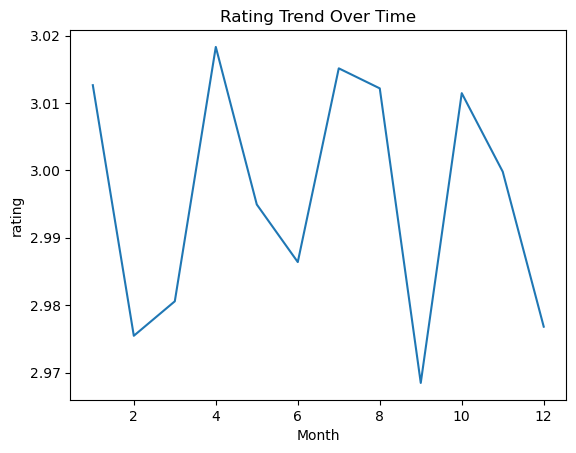

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(rating_trend)

plt.title("Rating Trend Over Time")
plt.show()


In [ ]:
""" Insight:Tracking rating trends helps understand customer satisfaction patterns and 
supports long-term product improvement strategies.Ratings in monthly  do not consistently improves over time."""

# Tools used

In [ ]:
"""In this project, I used Python along with Dask for big data processing, Matplotlib,Seaborn and plotly for visualization,
and Jupyter Notebook for development and documentation

# suggestion

In [ ]:
""" Based on the analysis, the company should maintain strong performance in the Middle East, improve customer 
satisfaction in Europe, and focus on targeted marketing strategies to increase customer engagement globally."""

# Conclusion

In [ ]:
""" This project analyzes Amazon sales data using Dask to demonstrate scalable data processing and extract business insights 
such as revenue trends, product performance, and customer satisfaction."""